# Predictive Model for Workers Required

Based on df2 dataset which includes the columns of:
1. role_id
2. area_id
3. Day
4. Month
5. Year
6. Hour
7. Day of Year
8. Week of Year
9. workers_required

Based on https://medium.com/datadriveninvestor/a-simple-guide-to-creating-predictive-models-in-python-part-2a-aa86ece98f86

### 1. Load Libraries

In [1]:
import pandas as pd #provides high-performance, easy-to-use data structures and data analysis tools
import numpy as np #fundamental package for scientific computing with Python
import seaborn as sns #Python data visualisation library based on matplotlib
import matplotlib.pyplot as plt #2D plotting library

from sklearn.preprocessing import LabelEncoder
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

### 2. Load Dataset

In [2]:
df = pd.read_csv('df2.csv')
df.head(10)

,Unnamed: 0,role_id,area_id,Day,Month,Year,Hour,Day of Year,Week of Year,workers_required
0,0,30,NaN,Sunday,October,2015,17,298,42,1
1,1,30,NaN,Sunday,October,2015,17,298,42,1
2,2,30,NaN,Sunday,October,2015,17,298,42,1
3,3,30,NaN,Saturday,October,2015,18,304,43,1
4,4,30,NaN,Saturday,October,2015,18,304,43,1
5,5,30,NaN,Saturday,October,2015,18,304,43,1
6,6,30,NaN,Saturday,October,2015,18,304,43,1
7,7,30,NaN,Saturday,October,2015,18,304,43,1
8,8,30,NaN,Saturday,November,2015,18,318,45,1
9,9,30,NaN,Saturday,November,2015,18,318,45,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133868 entries, 0 to 133867
Data columns (total 10 columns):
Unnamed: 0          133868 non-null int64
role_id             133868 non-null int64
area_id             12573 non-null float64
Day                 133868 non-null object
Month               133868 non-null object
Year                133868 non-null int64
Hour                133868 non-null int64
Day of Year         133868 non-null int64
Week of Year        133868 non-null int64
workers_required    133868 non-null int64
dtypes: float64(1), int64(7), object(2)
memory usage: 10.2+ MB


In [4]:
df['area_id'] = df['area_id'].replace(np.nan, 0)

In [5]:
df = df.drop(['Unnamed: 0'], axis=1)
df['role_id'] = df['role_id'].astype('object',copy=False)
df['area_id'] = df['area_id'].astype('object',copy=False)
#df['Hour'] = df['Hour'].astype('object',copy=False)
df['Hour'] = df['Hour'].astype('int64',copy=False)
#df['Day of Year'] = df['Day of Year'].astype('object',copy=False)
df['Day of Year'] = df['Day of Year'].astype('int64',copy=False)
#df['Week of Year'] = df['Week of Year'].astype('object',copy=False)
df['Week of Year'] = df['Week of Year'].astype('int64',copy=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133868 entries, 0 to 133867
Data columns (total 9 columns):
role_id             133868 non-null object
area_id             133868 non-null object
Day                 133868 non-null object
Month               133868 non-null object
Year                133868 non-null int64
Hour                133868 non-null int64
Day of Year         133868 non-null int64
Week of Year        133868 non-null int64
workers_required    133868 non-null int64
dtypes: int64(5), object(4)
memory usage: 9.2+ MB


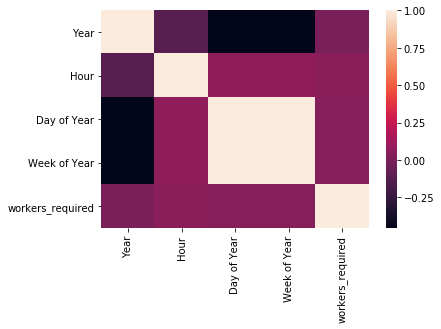

In [6]:
#checking correlation between variables.
corr = df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [7]:
# Data transformation
# Convert categorical values to numeric using label encoder
from sklearn import preprocessing
from collections import defaultdict
d = defaultdict(preprocessing.LabelEncoder)

# Encoding the categorical variable
fit = df.select_dtypes(include=['object']).fillna('NA').apply(lambda x: d[x.name].fit_transform(x))

#Convert the categorical columns based on encoding
for i in list(d.keys()):
    df[i] = d[i].transform(df[i].fillna('NA'))

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133868 entries, 0 to 133867
Data columns (total 9 columns):
role_id             133868 non-null int64
area_id             133868 non-null int64
Day                 133868 non-null int64
Month               133868 non-null int64
Year                133868 non-null int64
Hour                133868 non-null int64
Day of Year         133868 non-null int64
Week of Year        133868 non-null int64
workers_required    133868 non-null int64
dtypes: int64(9)
memory usage: 9.2 MB


### 3. https://medium.com/@srnghn/machine-learning-trying-to-predict-a-numerical-value-8aafb9ad4d36

In [9]:
#Creating train and test datasets

from sklearn.model_selection import train_test_split

X = df.drop(columns=['workers_required'],axis=1)
y = df["workers_required"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [10]:
X_train.shape

(107094, 8)

In [11]:
X_test.shape

(26774, 8)

### 4. Machnie Learning Models

In [12]:
#Standardisation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_scaled = scaler.fit_transform(X_train)
test_scaled = scaler.transform(X_test)

/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda2/lib/python2.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """


#### 4.1 Linear Regresion

In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [14]:
#Model Evaluation on Train Data
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mse = mean_squared_error(y_train, model.predict(train_scaled))
mae = mean_absolute_error(y_train, model.predict(train_scaled))
r2 = r2_score(y_train, model.predict(train_scaled))

from math import sqrt

print("Train: mse = ",mse," & mae = ",mae," & rmse = ", sqrt(mse)," & r2 score = ", r2)

('Train: mse = ', 28.535576658771507, ' & mae = ', 1.6376788700586735, ' & rmse = ', 5.341870146191454, ' & r2 score = ', 0.004936617246119934)


The easier metric to understand is the mean absolute error, this means that on average our prediction was 1.6 away from the true prediction. Mean squared error, and consequently root mean squared error (RMSE), results in predictions further and further from the true value are punished more.

In [15]:
#test data
test_mse = mean_squared_error(y_test, model.predict(test_scaled))
test_mae = mean_absolute_error(y_test, model.predict(test_scaled))
test_r2 = r2_score(y_test, model.predict(test_scaled))
print("Test: mse = ",test_mse," & mae = ",test_mae," & rmse = ", sqrt(test_mse)," & r2 score = ", test_r2)

('Test: mse = ', 20.285151043475704, ' & mae = ', 1.614128642192345, ' & rmse = ', 4.503903978047901, ' & r2 score = ', 0.005068143275712367)


Results are slightly better on the test data.

#### 4.2 Decision Trees & Random Forests

In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
tree_model = DecisionTreeRegressor()
rf_model = RandomForestRegressor()
tree_model.fit(train_scaled, y_train)
rf_model.fit(train_scaled, y_train)

/anaconda2/lib/python2.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [17]:
#Model Evaluation on Train Data
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

tree_mse = mean_squared_error(y_train, tree_model.predict(train_scaled))
tree_mae = mean_absolute_error(y_train, tree_model.predict(train_scaled))
rf_mse = mean_squared_error(y_train, rf_model.predict(train_scaled))
rf_mae = mean_absolute_error(y_train, rf_model.predict(train_scaled))
tree_r2 = r2_score(y_train, tree_model.predict(train_scaled))
rf_r2 = r2_score(y_train, rf_model.predict(train_scaled))

from math import sqrt

print("Decision Tree training mse = ",tree_mse," & mae = ",tree_mae," & rmse = ", sqrt(tree_mse)," & r2 score = ", tree_r2)
print("Random Forest training mse = ",rf_mse," & mae = ",rf_mae," & rmse = ", sqrt(rf_mse)," & r2 score = ", rf_r2)

('Decision Tree training mse = ', 18.30100843544473, ' & mae = ', 0.8807253167759128, ' & rmse = ', 4.27796779270774, ' & r2 score = ', 0.3618259907853245)
('Random Forest training mse = ', 19.4880195318621, ' & mae = ', 1.0427009803828964, ' & rmse = ', 4.414523703850971, ' & r2 score = ', 0.32043375641446625)


The easier metric to understand is the mean absolute error, this means that our predictions were perfect for the decision tree model but on average 1.0 away from the true prediction with the random forest model. Mean squared error, and consequently root mean squared error (RMSE), results in predictions further and further from the true value are punished more.

In [18]:
#test data
tree_test_mse = mean_squared_error(y_test, tree_model.predict(test_scaled))
tree_test_mae = mean_absolute_error(y_test, tree_model.predict(test_scaled))
rf_test_mse = mean_squared_error(y_test, rf_model.predict(test_scaled))
rf_test_mae = mean_absolute_error(y_test, rf_model.predict(test_scaled))
tree_test_r2 = r2_score(y_test, tree_model.predict(test_scaled))
rf_test_r2 = r2_score(y_test, rf_model.predict(test_scaled))
print("Decision Tree test mse = ",tree_test_mse," & mae = ",tree_test_mae," & rmse = ", sqrt(tree_test_mse)," & r2 score = ", tree_test_r2)
print("Random Forest test mse = ",rf_test_mse," & mae = ",rf_test_mae," & rmse = ", sqrt(rf_test_mse)," & r2 score = ", rf_test_r2)

('Decision Tree test mse = ', 18.079635288738075, ' & mae = ', 1.5006182701809399, ' & rmse = ', 4.252015438440702, ' & r2 score = ', 0.11324273266835794)
('Random Forest test mse = ', 15.835737604693369, ' & mae = ', 1.4726126325382618, ' & rmse = ', 3.979414228839889, ' & r2 score = ', 0.22329985200166325)


Results are worse for test data.

#### 4.3 Neural Networks

In [19]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier()
model.fit(train_scaled, y_train)

/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [20]:
#Model Evaluation on Train Data
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, model.predict(train_scaled)))

from sklearn.metrics import r2_score
print(r2_score(y_train, model.predict(train_scaled)))

0.6920088893868938
-0.017002054015926582


We have an accurary of 69.2% based on the training dataset.

In [21]:
print(accuracy_score(y_test, model.predict(test_scaled)))
print(r2_score(y_test, model.predict(test_scaled)))

0.6931351310973333
-0.06262673862318469


We have an accuracy of 69.3% based on the test dataset which is worse than the training.

#### 4.4 K Nearest Neighbors

In [22]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()
model.fit(train_scaled, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [23]:
#Model Evaluation on Train Data
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mse = mean_squared_error(y_train, model.predict(train_scaled))
mae = mean_absolute_error(y_train, model.predict(train_scaled))
r2 = r2_score(y_train, model.predict(train_scaled))

from math import sqrt

print("mse = ",mse," & mae = ",mae," & rmse = ", sqrt(mse)," & r2 score = ", r2)

('mse = ', 24.835434664873848, ' & mae = ', 1.3173343044428256, ' & rmse = ', 4.983516295235107, ' & r2 score = ', 0.1339641765327385)


The easier metric to understand is the mean absolute error, this means that our predictions were perfect for the decision tree model but on average 1.3 away from the true prediction with the random forest model. Mean squared error, and consequently root mean squared error (RMSE), results in predictions further and further from the true value are punished more.

In [24]:
#test data
test_mse = mean_squared_error(y_test, model.predict(test_scaled))
test_mae = mean_absolute_error(y_test, model.predict(test_scaled))
test_r2 = r2_score(y_test, model.predict(test_scaled))
print("Test: mse = ",test_mse," & mae = ",test_mae," & rmse = ", sqrt(test_mse)," & r2 score = ", test_r2)

('Test: mse = ', 25.057025472473292, ' & mae = ', 1.5411219840143422, ' & rmse = ', 5.005699299046367, ' & r2 score = ', -0.2289794058661372)


Results are worse for test data.

### 5. Final Model and Model Performance
The Random Forest model was chosen.

In [25]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(train_scaled, y_train)

#Model Evaluation on Train Data
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

rf_mse = mean_squared_error(y_train, rf_model.predict(train_scaled))
rf_mae = mean_absolute_error(y_train, rf_model.predict(train_scaled))
rf_r2 = r2_score(y_train, rf_model.predict(train_scaled))

from math import sqrt

print("Random Forest training mse = ",rf_mse," & mae = ",rf_mae," & rmse = ", sqrt(rf_mse)," & r2 score = ", rf_r2)


#test data
rf_test_mse = mean_squared_error(y_test, rf_model.predict(test_scaled))
rf_test_mae = mean_absolute_error(y_test, rf_model.predict(test_scaled))
rf_test_r2 = r2_score(y_test, rf_model.predict(test_scaled))
print("Random Forest test mse = ",rf_test_mse," & mae = ",rf_test_mae," & rmse = ", sqrt(rf_test_mse)," & r2 score = ", rf_test_r2)

('Random Forest training mse = ', 19.52548613580398, ' & mae = ', 1.0408827142022965, ' & rmse = ', 4.418765227504623, ' & r2 score = ', 0.31912725940182407)
('Random Forest test mse = ', 16.002479421958213, ' & mae = ', 1.485637787067971, ' & rmse = ', 4.000309915738806, ' & r2 score = ', 0.21512161633118)


The easier metric to understand is the mean absolute error, this means that our predictions were perfect for the decision tree model but on average 1.04 away from the true prediction with the random forest model. Mean squared error, and consequently root mean squared error (RMSE), results in predictions further and further from the true value are punished more.
Results are worse for test data.